# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies
import json
import pprint
import random
import requests
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from citipy import citipy
from datetime import datetime
from api_keys import weather_api_key

## Generate Cities List

In [28]:
url = "https://api.openweathermap.org/data/2.5/weather?q={cityName}&units=imperial&appid={APIkey}"

print(url)

cityNameList = []
cityList = []
currentLat = -90
currentLon = -180
not500 = True

while not500:
    
    currentLat = random.randint(-90, 90)
    currentLon = random.randint(-180, 180)
    
    newCity = citipy.nearest_city(currentLat, currentLon)
    if not newCity.city_name in cityNameList:
        cityNameList.append(newCity.city_name)
        cityList.append(newCity)
        
#     currentLon += 1
    
#     if currentLon == 180:
#         currentLon = -180
#         currentLat += 1
        
    if len(cityNameList) == 500:
        not500 = False
        
cityNameList

https://api.openweathermap.org/data/2.5/weather?q={cityName}&units=imperial&appid={APIkey}


['pisco',
 'lompoc',
 'faanui',
 'norman wells',
 'ponta do sol',
 'tabiauea',
 'bhasawar',
 'tumannyy',
 'port alfred',
 'maniitsoq',
 'san miguel',
 'bluff',
 'skibbereen',
 'wukari',
 'georgetown',
 'ouadda',
 'attawapiskat',
 'qaanaaq',
 'mataura',
 'sterling',
 'hermanus',
 'new norfolk',
 'kapaa',
 'rikitea',
 'santa teresa',
 'boatlaname',
 'dukat',
 'kahului',
 'albany',
 'yellowknife',
 'ushuaia',
 'chegdomyn',
 'kodiak',
 'clyde river',
 'cape town',
 'tortoli',
 'korla',
 'blackwater',
 'magdalena',
 'letlhakeng',
 'mar del plata',
 'puerto ayora',
 'grand gaube',
 'azuaga',
 'tasiilaq',
 'abu samrah',
 'taolanaro',
 'punta arenas',
 'samusu',
 'vaini',
 'illoqqortoormiut',
 'linxia',
 'kendari',
 'carnarvon',
 'kaitangata',
 'zyryanskoye',
 'lebu',
 'ostrovnoy',
 'jamestown',
 'freetown',
 'bela',
 'castro',
 'jizan',
 'arraial do cabo',
 'mys shmidta',
 'paradise valley',
 'taoudenni',
 'shelburne',
 'amderma',
 'cabo san lucas',
 'chaman',
 'chokurdakh',
 'sioux lookout',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
#query_url = url + "appid=" + api_key + "&q=" + city
weatherList = []

for city in cityList:
    queryString = url.format(cityName = city.city_name, APIkey = weather_api_key)

    weather_response = requests.get(queryString)
    weather_json = weather_response.json()

    #print(weather_json)
    weatherList.append(weather_json)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
finalWeatherSet = []
failedItemCount = 0

pp = pprint.PrettyPrinter(width=41, compact=True)
#pp.pprint(weatherList)


for weatherData in weatherList:
    try:     
        newWeatherItem = [weatherData['name'], weatherData['coord']['lat'], weatherData['coord']['lon'], 
                     weatherData['main']['temp_max'], weatherData['main']['humidity'], weatherData['clouds']['all'], 
                     weatherData['wind']['speed'], weatherData['sys']['country'], weatherData['dt']]
        
        finalWeatherSet.append(newWeatherItem)
    except:
        failedItemCount += 1

print('Failed on {count} items.'.format(count=failedItemCount))
weatherFrame = pd.DataFrame(finalWeatherSet, )
weatherFrame.columns = ['City', 'Lat', 'Lon', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'County', 'Date']
#pp.pprint(finalWeatherSet)
print(weatherFrame.head())

Failed on 46 items.
           City    Lat     Lon  Max Temp  Humidity  Cloudiness  Wind Speed  \
0         Pisco -13.70  -76.22     63.00        82           0       13.87   
1        Lompoc  34.64 -120.46     64.99        52           1        6.85   
2        Faanui -16.48 -151.75     78.46        80           4       11.86   
3  Norman Wells  65.28 -126.83     23.00        67          75        3.36   
4  Ponta do Sol  32.67  -17.10     69.80        73          20       16.11   

  County        Date  
0     PE  1602560253  
1     US  1602560096  
2     PF  1602560254  
3     CA  1602560254  
4     PT  1602560254  


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
humidyCheckedData = weatherFrame.loc[weatherFrame['Humidity'] <= 100]
brokenHumidityData = weatherFrame.loc[weatherFrame['Humidity'] > 100]

print(humidyCheckedData.head())
print(len(brokenHumidityData))

           City    Lat     Lon  Max Temp  Humidity  Cloudiness  Wind Speed  \
0         Pisco -13.70  -76.22     63.00        82           0       13.87   
1        Lompoc  34.64 -120.46     64.99        52           1        6.85   
2        Faanui -16.48 -151.75     78.46        80           4       11.86   
3  Norman Wells  65.28 -126.83     23.00        67          75        3.36   
4  Ponta do Sol  32.67  -17.10     69.80        73          20       16.11   

  County        Date  
0     PE  1602560253  
1     US  1602560096  
2     PF  1602560254  
3     CA  1602560254  
4     PT  1602560254  
0


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [32]:
#  Get the indices of cities that have humidity over 100%.
brokenHumidityList = weatherFrame.index[weatherFrame['Humidity'] > 100].tolist()

print(brokenHumidityList)

[]


In [33]:
newCheckedHumidityList = weatherFrame.drop(brokenHumidityList)

newCheckedHumidityList.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,County,Date
0,Pisco,-13.70,-76.22,63.00,82,0,13.87,PE,1602560253
1,Lompoc,34.64,-120.46,64.99,52,1,6.85,US,1602560096
2,Faanui,-16.48,-151.75,78.46,80,4,11.86,PF,1602560254
3,Norman Wells,65.28,-126.83,23.00,67,75,3.36,CA,1602560254
4,Ponta do Sol,32.67,-17.10,69.80,73,20,16.11,PT,1602560254


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

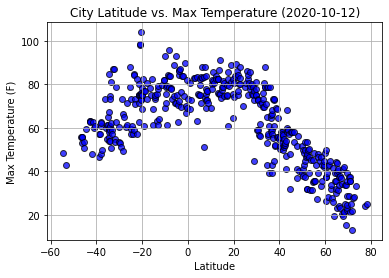

In [34]:
sortedHumidityData = newCheckedHumidityList.sort_values('Lat')

plt.scatter(sortedHumidityData['Lat'], sortedHumidityData['Max Temp'], marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.title("City Latitude vs. Max Temperature (" + datetime.today().strftime('%Y-%m-%d') + ')')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.show()

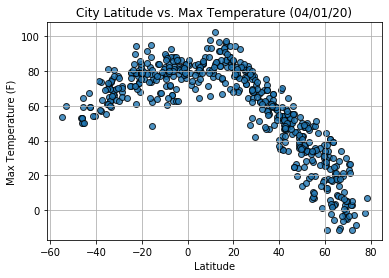

## Latitude vs. Humidity Plot

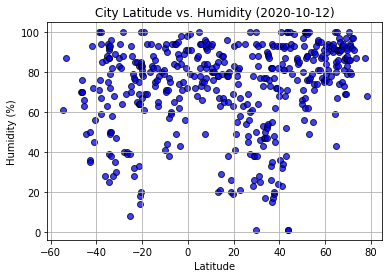

In [35]:
plt.scatter(sortedHumidityData['Lat'], sortedHumidityData['Humidity'], marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.title("City Latitude vs. Humidity (" + datetime.today().strftime('%Y-%m-%d') + ')')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()

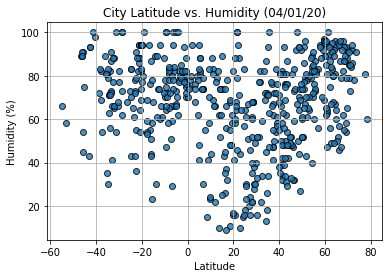

## Latitude vs. Cloudiness Plot

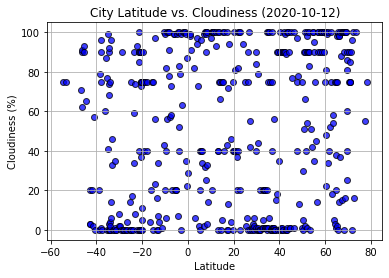

In [36]:
plt.scatter(sortedHumidityData['Lat'], sortedHumidityData['Cloudiness'], marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.title("City Latitude vs. Cloudiness (" + datetime.today().strftime('%Y-%m-%d') + ')')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()

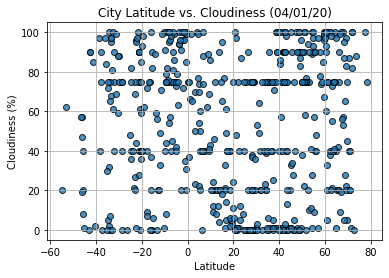

## Latitude vs. Wind Speed Plot

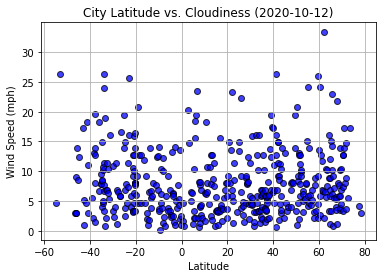

In [37]:
plt.scatter(sortedHumidityData['Lat'], sortedHumidityData['Wind Speed'], marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.title("City Latitude vs. Cloudiness (" + datetime.today().strftime('%Y-%m-%d') + ')')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.show()

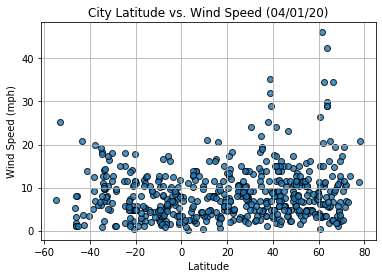

## Linear Regression

In [40]:
northernLatitudes = weatherFrame.loc[weatherFrame['Lat'] > 0]['Lat']
northernMaxTemps = weatherFrame.loc[weatherFrame['Lat'] > 0]['Max Temp']

northernTempCorrelation = st.pearsonr(northernLatitudes, northernMaxTemps)

print(f"The correlation between both factors is {round(northernTempCorrelation[0],2)}")

The correlation between both factors is -0.89


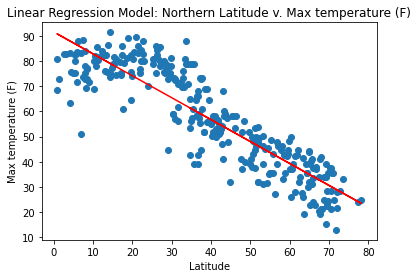

In [41]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northernLatitudes, northernMaxTemps)
regress_values = northernLatitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northernLatitudes,northernMaxTemps)
plt.plot(northernLatitudes,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.title('Linear Regression Model: Northern Latitude v. Max temperature (F)')
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


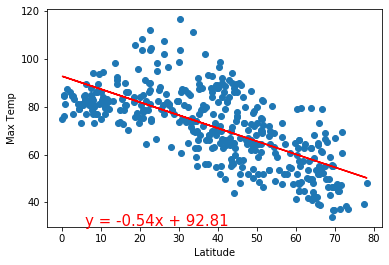

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [42]:
southernLatitudes = weatherFrame.loc[weatherFrame['Lat'] < 0]['Lat']
southernMaxTemps = weatherFrame.loc[weatherFrame['Lat'] < 0]['Max Temp']

southernTempCorrelation = st.pearsonr(southernLatitudes, southernMaxTemps)

print(f"The correlation between both factors is {round(southernTempCorrelation[0],2)}")

The correlation between both factors is 0.63


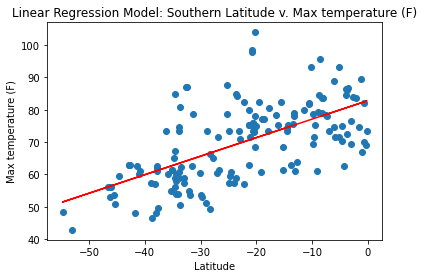

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southernLatitudes, southernMaxTemps)
regress_values = southernLatitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southernLatitudes,southernMaxTemps)
plt.plot(southernLatitudes,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.title('Linear Regression Model: Southern Latitude v. Max temperature (F)')
plt.show()

The r-value is: 0.6082708688906918


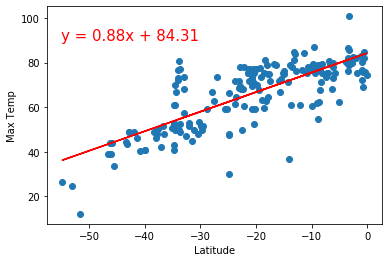

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


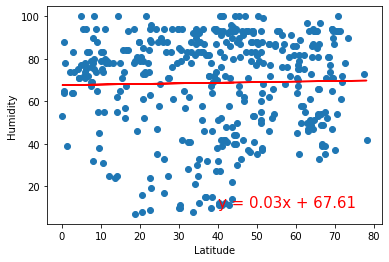

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


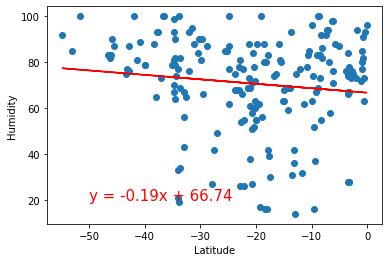

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


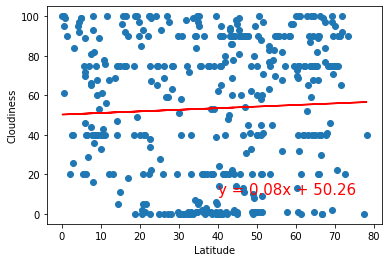

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


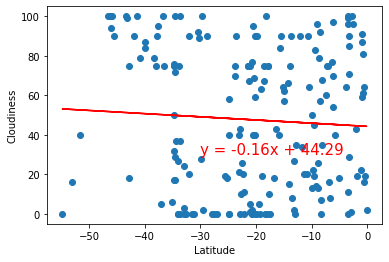

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


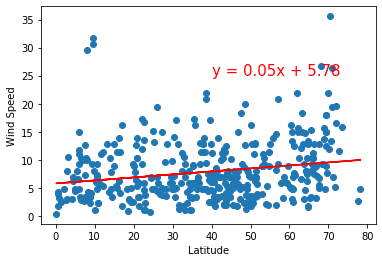

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


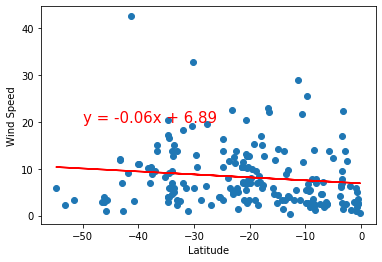